# Telco Customer Churn Analysis

The purpose of this project is to explore a customer database from Kaggle in order to draw actionable insights about customer churn.

The database being used is drawn from a Telco company. For the purposes of our analysis, we will be seeking to understand what attributes drive churn (tenure? type of customer service?) and then seeking to build models that predict which customers will provide recurring revenue over a lifetime. This will inform how to market to customers going forward.

## Downloading the Dataset

dataset_url = https://www.kaggle.com/blastchar/telco-customer-churn

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
pip install kaleido

     |████████████████████████████████| 79.9 MB 95.6 MB/s 
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import os

In [4]:
telco_data =pd.read_csv("../input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [5]:
project_name = "Telco_Churn_Analysis" 

## Data Preparation and Cleaning

Clean data and check for nulls.  
We also need to check that entries are of the correct data type.



In [6]:
telco_df = pd.read_csv('../input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [7]:
telco_df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


### Understand the dataset in question

1. Each row represents a customer, each column contains customer’s attributes described on the column Metadata (on Kaggle https://www.kaggle.com/blastchar/telco-customer-churn).  


2. The data set includes information about:  

    a. Customers who left within the last month – the column is called Churn.   
    
        1. "No" value in this column indicates that they are current customers  
        
        2. "Yes" value in this column indicates that they churned and are no longer customers.  
        
    b. Services that each customer has signed up for, which include:  
    
        1.Phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV & movies  
        
    c. Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges    
    
    
    d. Demographic info about customers – gender, age range, and if they have partners and dependents

There are no nulls, but TotalCharges is an object

In [8]:
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
telco_df['TotalCharges'].dtype

dtype('O')

In [10]:
telco_df['TotalCharges'] = pd.to_numeric(telco_df['TotalCharges'], errors="coerce")

## Exploratory Analysis and Visualization

**Visualize and calculate measures of central tendency for the data.**  

In this section, we will seek to gain insight into the data using visuals like:  
Heat maps, histograms, scatter plots, and bar plots



Let's begin by importing`matplotlib.pyplot`, plotly and `seaborn`.

In [11]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [12]:
#Define columns of interest from the dataset as variables
tenure = telco_df["tenure"]
monthly_charges = telco_df["MonthlyCharges"]
servicetype = telco_df["InternetService"]
churn = telco_df["Churn"]
senior = telco_df["SeniorCitizen"]
service = telco_df["InternetService"]
total_charges= telco_df["TotalCharges"]

### Histograms  
**We will begin by using histograms to see the distributions of variables**

Histogram of tenure distribution

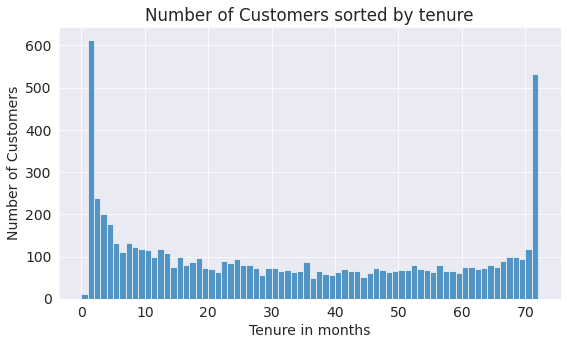

In [13]:
ax = sns.histplot(telco_data['tenure'], stat='count', bins=72)
ax.set_ylabel('Number of Customers')
ax.set_xlabel('Tenure in months')
ax.set_title('Number of Customers sorted by tenure')
plt.show()

Histogram of monthly charges distribution

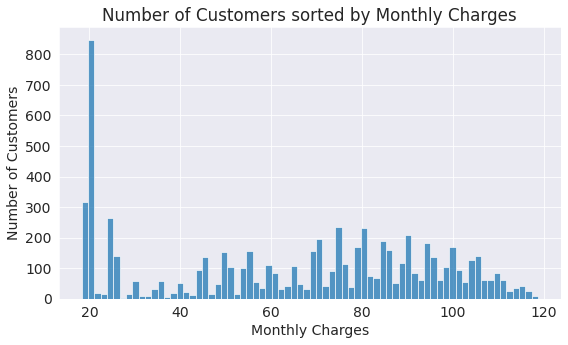

In [14]:
ax = sns.histplot(telco_data['MonthlyCharges'], stat='count', bins=72)
ax.set_ylabel('Number of Customers')
ax.set_xlabel('Monthly Charges')
ax.set_title('Number of Customers sorted by Monthly Charges')
plt.show()

Histogram of SeniorCitizen distribution

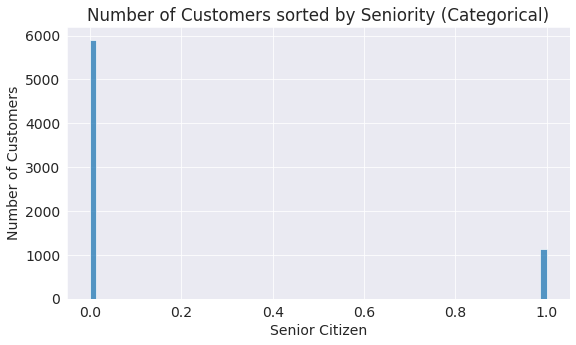

In [15]:
ax = sns.histplot(telco_data['SeniorCitizen'], stat='count', bins=72)
ax.set_ylabel('Number of Customers')
ax.set_xlabel('Senior Citizen')
ax.set_title('Number of Customers sorted by Seniority (Categorical)')
plt.show()

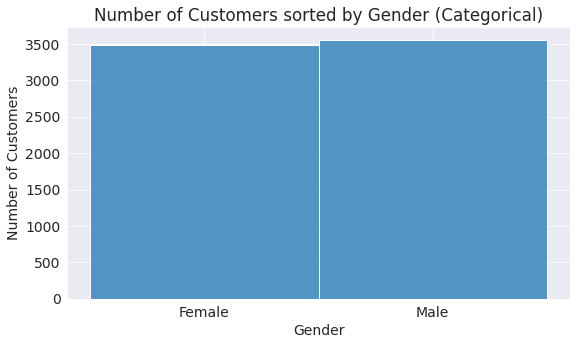

In [16]:
ax = sns.histplot(telco_data['gender'], stat='count', bins=72)
ax.set_ylabel('Number of Customers')
ax.set_xlabel('Gender')
ax.set_title('Number of Customers sorted by Gender (Categorical)')
plt.show()

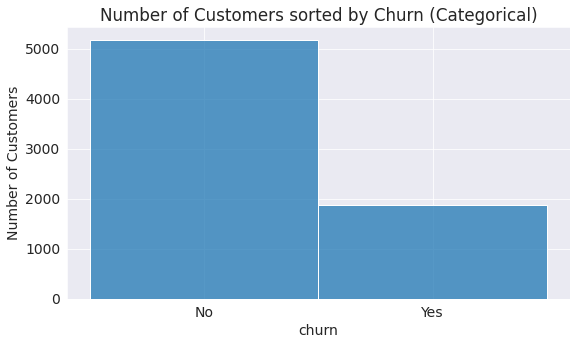

In [17]:
ax = sns.histplot(telco_data['Churn'], stat='count', bins=72)
ax.set_ylabel('Number of Customers')
ax.set_xlabel('churn')
ax.set_title('Number of Customers sorted by Churn (Categorical)')
plt.show()

##### Conclusions:  
1. There are lots of customers with long and short tenures.  
2. Monthly charges have a lot of low charges, and aside from that is fairly normally distributed.  
3. There are not many senior citizens compared to non-seniors.  
4. Gender distribution is fairly even.  
5. Roughly 2000 customers churned vs roughly 5000 customers were retained.

### Heat Map

First we will print a correlation matrix that shows how variables correlate with each other.  

Next we will print a heatmap representation of the above correlation matrix


In [18]:
telco_df.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.102411
tenure,0.016567,1.000000,0.247900,0.825880
MonthlyCharges,0.220173,0.247900,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


<AxesSubplot:>

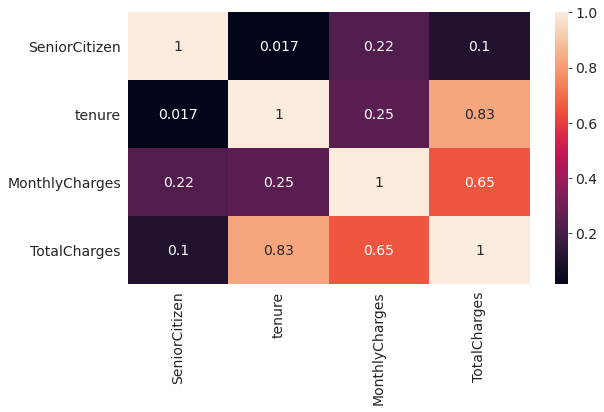

In [19]:
sns.heatmap(telco_df.corr(), annot=True)

**Interpretation of degrees of correlation:**

Perfect: If the value is near ± 1, then it said to be a perfect correlation: as one variable increases, the other variable tends to also increase (if positive) or decrease (if negative).

High degree: If the coefficient value lies between ± 0.50 and ± 1, then it is said to be a strong correlation.

Moderate degree: If the value lies between ± 0.30 and ± 0.49, then it is said to be a medium correlation.

Low degree: When the value lies below + .29, then it is said to be a small correlation.

No correlation: When the value is zero.

##### Conclusions:  
1. Tenure and TotalCharges are strongly correlated, which is logical since the longer you have been a customer, the more money you will likely spend.  
2. MonthlyCharges and TotalCharges are correlated, which is logical since a high monthly expense will ultimately lead to a high total expense. 

### Distplots

<AxesSubplot:xlabel='tenure', ylabel='Density'>

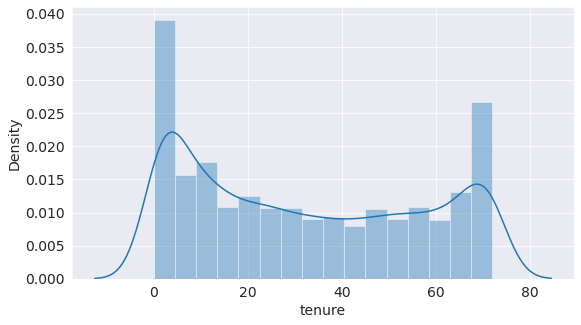

In [20]:
sns.distplot(telco_df.tenure)

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

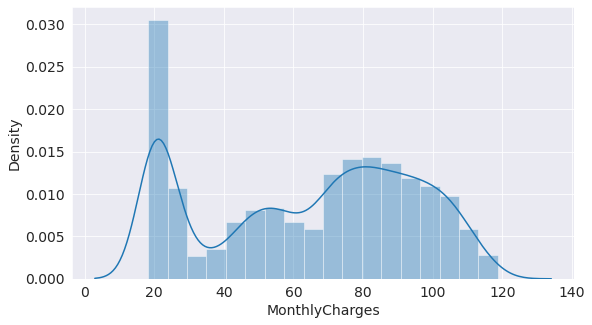

In [21]:
sns.distplot(telco_df.MonthlyCharges)

### Pairplots

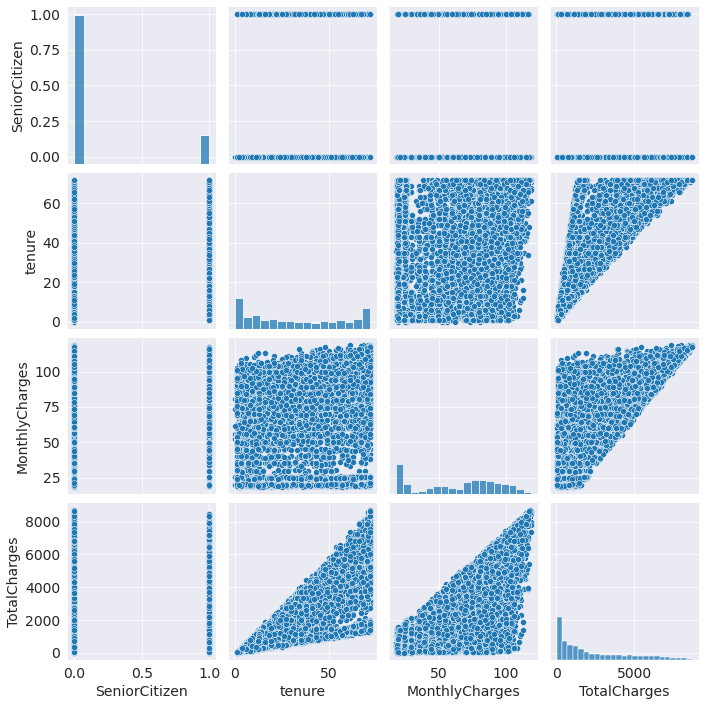

In [22]:
sns.pairplot(telco_df)

### Scatter Plots

Here we show scatter plot representations of the relationships between Charges and tenure.

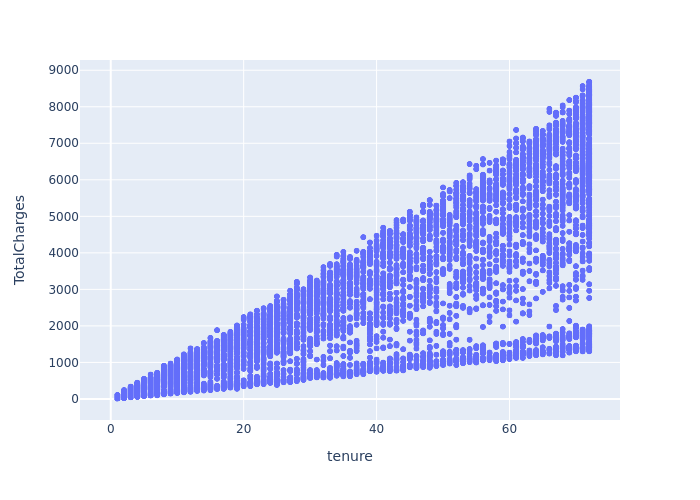

In [23]:
fig = px.scatter(telco_df, y="TotalCharges", x="tenure")
fig.show("png")

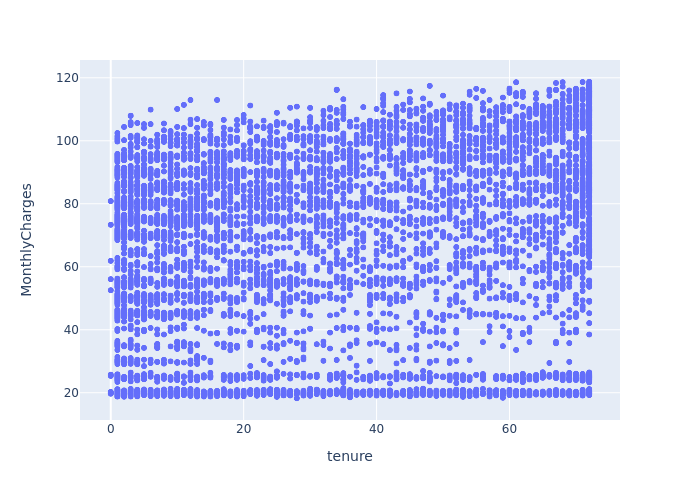

In [24]:
fig = px.scatter(telco_df, y="MonthlyCharges", x="tenure")
fig.show("png")

##### Conclusions:  

Total Charges and tenure (logically) have a linear relationship. Monthly charges and tenure do not.

### Barplots  

Here we get averages attributes of the groups that churned vs did not churn. The black bar represents standard deviation.

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

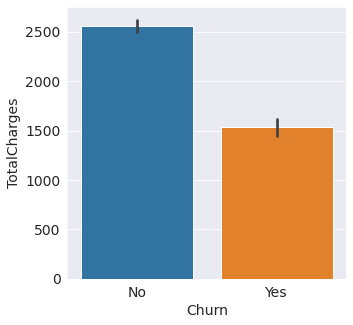

In [25]:
plt.figure(figsize=(5, 5))
sns.barplot(data = telco_df, y="TotalCharges", x="Churn")

<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharges'>

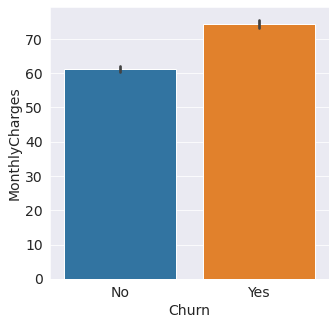

In [26]:
plt.figure(figsize=(5, 5))
sns.barplot(data = telco_df, y="MonthlyCharges", x="Churn")

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

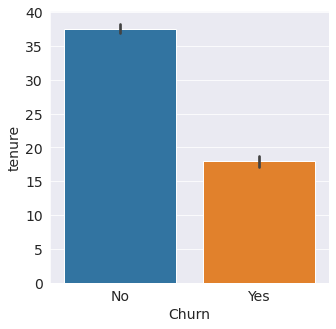

In [27]:
plt.figure(figsize=(5, 5))
sns.barplot(data = telco_df, y="tenure", x="Churn")

<AxesSubplot:xlabel='Churn', ylabel='SeniorCitizen'>

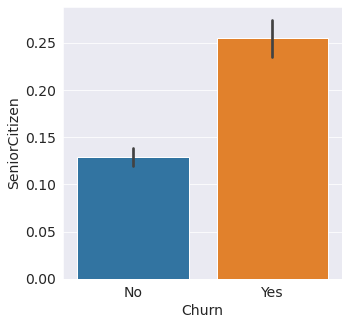

In [28]:
plt.figure(figsize=(5, 5))
sns.barplot(data = telco_df, y="SeniorCitizen", x="Churn")

##### Conclusions  
1. The group that churned had a lower totalcharges amount than the group that did not churn.  
2. The group that churned had a higher monthlycharges amount than the group that did not churn. Perhaps they found another carrier that was cheaper by month.  
3. The group that churned had a shorter tenure than the group that did not churn.  
4. Senior citizens were more likely to churn.

#### Bar plot analysis  
1. Break out group by churn vs did not churn  
2. Break out group by male vs female  
3. Break out group by internet service type

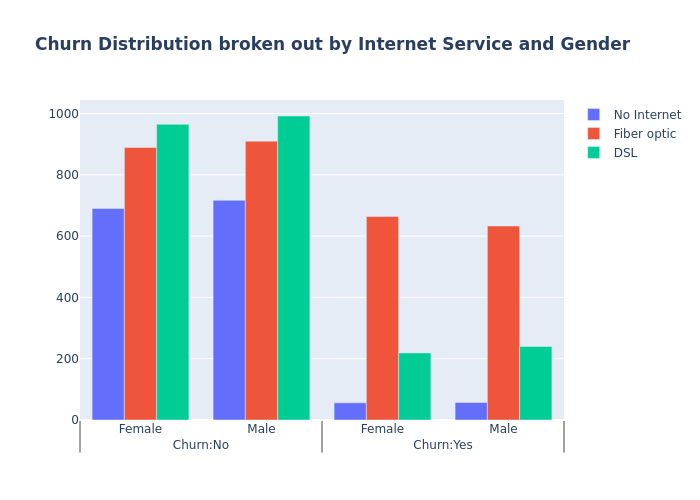

In [29]:
fig = go.Figure()

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [690, 717, 56, 57],
  name = 'No Internet',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [889, 910, 664, 633],
  name = 'Fiber optic',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [965, 992, 219, 240],
  name = 'DSL',
))



fig.update_layout(title_text="<b>Churn Distribution broken out by Internet Service and Gender</b>")

fig.show("png")

##### Conclusions  
1. Men and women churned at very similar rates.  
2. Fiber optic customers were by far the most likely to churn.

##### Dependents Breakout by Churn

In [30]:
color_map = {"Yes": 'red', "No": 'blue'}
fig = px.histogram(telco_df, x="Churn", color="Dependents", barmode="group", title="<b>Dependents Breakout by Churn</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

### Measures of central tendency

Here we are able to see the measures of central tendency, such as mean and standard deviation, for the numeric values in the table.

In [31]:
telco_df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


## Asking and Answering Questions

Analyze the data to draw conclusions



#### Q1: Overall Churn Statistics

For our first question, we will seek to calculate the overall churn statistics for our table. We will do this by:  
1. Converting churn to a boolean.  
2. Count the total churn in the table. Sum works here because True booleans evaluate to 1 and False booleans evaluate to 0  
3. Count the total rows in the table  
4. Divide to find total churn rate

In [32]:
telco_data["Churn"] = telco_data["Churn"].map(
    {'Yes':True , 'No':False})

In [33]:
churn_count_total = sum(telco_data["Churn"])
churn_count_total

1869

In [34]:
count_of_total = len(telco_data)
count_of_total

7043

In [35]:
churn_rate_total = churn_count_total/count_of_total
churn_rate_total 

0.2653698707936959

**So the overall churn rate for the whole table is 26.537%**

#### Q2: Churn for customers with < 6 months tenure

For our second question question, we will seek to calculate the  churn statistics for short tenured customers. We seek to test the hypothesis that short tenured customers are our biggest churners and therefore our biggest point of opportunity. We will do this by:  

Making a table for customers with tenure less than 6 months and find churn rate.  
We will then compare the rate to the overall rate and to the customers in the other tenures buckets.

In [36]:
short_tenure_telco_data = telco_data.copy()

short_indexNames = short_tenure_telco_data[~(short_tenure_telco_data['tenure'] < 6)].index 

short_tenure_telco_data.drop(short_indexNames , inplace=True)

short_tenure_telco_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,False
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,True
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,True
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,True
22,1066-JKSGK,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7016,1471-GIQKQ,Female,0,No,No,1,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Electronic check,49.95,49.95,False
7018,1122-JWTJW,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,70.65,70.65,True
7030,0871-OPBXW,Female,0,No,No,2,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.05,39.25,False
7032,6894-LFHLY,Male,1,No,No,1,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,True


In [37]:
churn_count_short_tenure = sum(short_tenure_telco_data["Churn"])
churn_count_short_tenure

744

In [38]:
count_of_short_tenure = len(short_tenure_telco_data)
count_of_short_tenure

1371

In [39]:
churn_rate_short_tenure = churn_count_short_tenure/count_of_short_tenure
churn_rate_short_tenure

0.5426695842450766

In [40]:
churn_rate_short_tenure/churn_rate_total 

2.04495552800325

**So the 744 customers with less than 6 months tenure churned at a 54.267% rate, more than double the overall churn rate!**

#### Q3: Churn for customers with 6-24 months tenure

For our third question, we will seek to calculate the churn statistics for medium tenured customers. We will do this by:  

Making a table for customers with tenure 6-24 months and find churn rate.  
We will then compare the rate to the overall rate and to the customers in the other tenures buckets.

In [41]:
shortableindex = short_tenure_telco_data.index

medium_tenure_telco_data = telco_data.copy()

medium_tenure_telco_data.drop(shortableindex , inplace=True)

medium_indexNames = medium_tenure_telco_data[~(medium_tenure_telco_data['tenure'] <= 24)].index 
medium_tenure_telco_data.drop(medium_indexNames , inplace=True)
medium_tenure_telco_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,True
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,False
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,False
10,9763-GRSKD,Male,0,Yes,Yes,13,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,49.95,587.45,False
11,7469-LKBCI,Male,0,No,No,16,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),18.95,326.8,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7029,2235-DWLJU,Female,1,No,No,6,No,No phone service,DSL,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,44.40,263.05,False
7035,8456-QDAVC,Male,0,No,No,19,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.1,False
7036,7750-EYXWZ,Female,0,No,No,12,No,No phone service,DSL,No,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,60.65,743.3,False
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,False


In [42]:
churn_count_medium_tenure = sum(medium_tenure_telco_data["Churn"])
churn_count_medium_tenure

587

In [43]:
count_of_medium_tenure = len(medium_tenure_telco_data)
count_of_medium_tenure

1839

In [44]:
churn_rate_medium_tenure = churn_count_medium_tenure/count_of_medium_tenure
churn_rate_medium_tenure

0.3191952147906471

In [45]:
churn_rate_medium_tenure-churn_rate_total

0.053825343996951214

**So the 587 customers with between 6 and 24 months tenure churned at a 31.92% rate, 5.38% higher than the overall rate.**



#### Q4: Churn for customers with with 24+ months tenure

For our fourth question, we will seek to calculate the churn statistics for long tenured customers. We will do this by:  

Make a table for customers with tenure 24+ months and find churn rate.  
We will then compare the rate to the overall rate and to the customers in the other tenures buckets.

In [46]:
mediumtableindex = medium_tenure_telco_data.index

In [47]:
long_tenure_telco_data = telco_data.copy()

long_tenure_telco_data.drop(shortableindex , inplace=True)
long_tenure_telco_data.drop(mediumtableindex , inplace=True)

long_tenure_telco_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,False
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,False
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,True
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,False
12,8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7033,9767-FFLEM,Male,0,No,No,38,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),69.50,2625.25,False
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,True
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,False
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,False


In [48]:
churn_count_long_tenure = sum(long_tenure_telco_data["Churn"])
churn_count_long_tenure

538

In [49]:
count_of_long_tenure = len(long_tenure_telco_data)
count_of_long_tenure

3833

In [50]:
churn_rate_long_tenure = churn_count_long_tenure/count_of_long_tenure
churn_rate_long_tenure

0.14036003130707017

In [51]:
churn_rate_long_tenure-churn_rate_total

-0.12500983948662572

So the 538 customers with tenure longer than 24 months churned at 14.036%, 12.5% less than the total

Check to make sure totals tie out and evaluate to True

In [52]:
churn_count_short_tenure+churn_count_medium_tenure+churn_count_long_tenure == churn_count_total

True

In [53]:
count_of_short_tenure+count_of_medium_tenure+count_of_long_tenure == count_of_total

True

**Print the results of our churn analysis**

In [54]:
formatted_totalchurn = "{:.2f}".format(churn_rate_total*100)
formatted_shortchurn = "{:.2f}".format(churn_rate_short_tenure*100)
formatted_medchurn = "{:.2f}".format(churn_rate_medium_tenure*100)
formatted_longchurn = "{:.2f}".format(churn_rate_long_tenure*100)

In [55]:
print("The overall churn rate for the Telco dataset is " , formatted_totalchurn, "%") 
print("The churn rate for customers with less than 6 months tenure is", formatted_shortchurn, "%")
print("The churn rate for customers with 6-24 months tenure is", formatted_medchurn, "%")
print("The churn rate for customers with 24+ months tenure is", formatted_longchurn, "%")

The overall churn rate for the Telco dataset is  26.54 %
The churn rate for customers with less than 6 months tenure is 54.27 %
The churn rate for customers with 6-24 months tenure is 31.92 %
The churn rate for customers with 24+ months tenure is 14.04 %


#### Q5: Tenure/TotalCharges Simple Linear Regression

**For our fifth question, we are going to analyze the Data using a simple linear regression.**  

The question we seek to answer here is whether we could provide value to the Telco company by creating a simple linear regression model that uses tenure to predict total charges, since we noticed a strong correlation between the two above

A simple linear regression predicts the value of one variable using a second variable. The steps involved in building a regression are as follows:

1. Teach the regression what the relationship is between the variables using your data.    

    a. It uses the value of the "predictor variable" (X) to predict the value of the "criterion variable" (Y).    

    b. So in this case, we will be splitting our data into two parts: one that contains 90% of the data and one that contains 10% of the data.  

    c. The regression will use that first 90% of the data to train itself.  
    
    d. We will then test what it has learned on the other 10% of the data.    
    
    
2. Check the results of the test for accuracy    


3. If the results are accurate, you now have a model that can predict (Y) values using only (X) inputs

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression

In [57]:
telco_data['TotalCharges'] = pd.to_numeric(telco_data['TotalCharges'], errors='coerce')

In [58]:
tenure_total_charges = telco_data[['tenure','TotalCharges']]

In [59]:
tenure_total_charges['tenure'].isnull().sum()

0

In [60]:
tenure_total_charges['TotalCharges'].isnull().sum()

11

In [61]:
updated_tenure_total_charges = tenure_total_charges.dropna(subset=['TotalCharges'])

In [62]:
updated_tenure_total_charges['TotalCharges'].isnull().sum()

0

In [63]:
updated_tenure_total_charges.shape

(7032, 2)

In [64]:
updated_tenure_total_charges.head

<bound method NDFrame.head of       tenure  TotalCharges
0          1         29.85
1         34       1889.50
2          2        108.15
3         45       1840.75
4          2        151.65
...      ...           ...
7038      24       1990.50
7039      72       7362.90
7040      11        346.45
7041       4        306.60
7042      66       6844.50

[7032 rows x 2 columns]>

In [65]:
updated_tenure_total_charges.describe()

,tenure,TotalCharges
count,7032.000000,7032.000000
mean,32.421786,2283.300441
std,24.545260,2266.771362
min,1.000000,18.800000
25%,9.000000,401.450000
50%,29.000000,1397.475000
75%,55.000000,3794.737500
max,72.000000,8684.800000


<AxesSubplot:xlabel='tenure'>

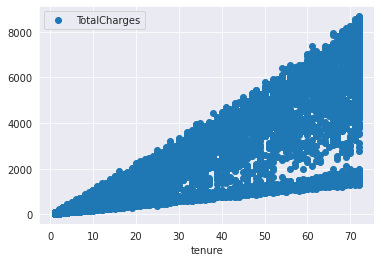

In [66]:
updated_tenure_total_charges.plot(x = 'tenure', y = 'TotalCharges' , style = 'o')

X will take in tenure and Y will take in TotalCharges

In [67]:
X = updated_tenure_total_charges.iloc[:, :-1].values

y = updated_tenure_total_charges.iloc[:, 1].values

Split our data into 2 parts- the "training" part that trains our model, and our "test" part that tests its predictive ability
Our test size = 0.1, meaning we are training using 90% of the data and testing using 10% of the data

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

Train the algorithim

In [69]:
regressor = LinearRegression()
regressor.fit(X_train, y_train) 

LinearRegression()

Now that the model is trained, it has created a linear equation for calculating outputs.
A linear equation takes the form y = mX + b.
Think of it as a slope equation in algebra.

y = variable we are trying to predict (TotalCharges)

m = slope

X = variable we are using to predict (tenure)

b = intercept (value of y when X = 0)

Print the intercept- what our model thinks TotalCharges should be when tenure = 0

In [70]:
print(regressor.intercept_)

-187.771273102152


**So our intercept is negative, which is not accurate**

Print the slope- how much our model thinks TotalCharges changes for every 1 unit change to tenure

In [71]:
print(regressor.coef_)

[76.20354135]


**So our slope is positive, which is directionally accurate since TotalCharges increases as tenure increases (as we saw when we plotted our data)**

In [72]:
y_pred = regressor.predict(X_test)

In [73]:
updated_tenure_total_charges_regression = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
updated_tenure_total_charges_regression

,Actual,Predicted
0,20.65,-111.567732
1,330.25,1031.485388
2,19.80,-111.567732
3,24.25,-111.567732
4,74.40,-111.567732
...,...,...
699,4238.45,4003.423501
700,2243.90,2022.131426
701,3122.40,3165.184546
702,1240.15,4689.255373


Mean Absolute Error (MAE) is the mean of the absolute value of the errors.  

Mean Squared Error (MSE) is the mean of the squared errors  

Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:

In [74]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 883.0735181494618
Mean Squared Error: 1631877.065315046
Root Mean Squared Error: 1277.4494374788562


In [75]:
totalchargesmean = telco_data['TotalCharges'].mean()
totalchargesmean

2283.3004408418697

In [76]:
Root_mean_squared_error = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [77]:
single_RMSE_over_totalchargesmean = Root_mean_squared_error/totalchargesmean
single_RMSE_over_totalchargesmean

0.5594749664252906

The programming website stackabuse suggests dividing root mean squared error (RMSE) by the mean of the column you were trying to predict to evaluate accuracy.

If RMSE is less than 10% of the mean of the criterion column, then the model is decent.

Source: https://stackabuse.com/linear-regression-in-python-with-scikit-learn

**Q5 Conclusion: Evaluate our model**

So RMSE is almost 56% of the mean of the criterion column, meaning our model is not accurate at all.

Why is this the case?
Real world datasets are too large and complex to be predicted with just one predictor variable.
This makes simple linear regression an unreliable tool.

**Therefore, as our answer to question 5, we must conclude that a simple linear regression model using tenure to predict totalcharges cannot drive value for this Telco company**

In order to get a more accurate model, it is necessary to use multiple predictor variables.
Let's try using multiple linear regression to get a more accurate result.

#### Q6: Multiple Linear Regression

For our sixth and final question, we are going to analyze the Data using a multiple linear regression.

The question we seek to answer here is whether we could provide value to the Telco company by creating a simple multiple regression model that uses two variables, tenure and monthly charges to predict total charges, since we noticed a correlation between the variables above.

In [78]:
from sklearn import linear_model
import statsmodels.api as sm

In [79]:
tenure_monthly_total_charges = telco_data[['tenure', 'MonthlyCharges','TotalCharges']]

In [80]:
tenure_monthly_total_charges['TotalCharges'].isnull().sum()

11

In [81]:
tenure_monthly_total_charges['MonthlyCharges'].isnull().sum()

0

In [82]:
tenure_monthly_total_charges['tenure'].isnull().sum()

0

In [83]:
updated_tenure_monthly_total_charges = tenure_monthly_total_charges.dropna(subset=['TotalCharges'])

In [84]:
updated_tenure_monthly_total_charges['TotalCharges'].isnull().sum()

0

Make X1 take in tenure and MonthlyCharges  
Make Y1 take in TotalCharges

In [85]:
X1 = updated_tenure_monthly_total_charges[['tenure', 'MonthlyCharges']]

Y1 = updated_tenure_monthly_total_charges['TotalCharges']

Split our data into 2 parts- the "training" part that trains our model, and our "test" part that tests its predictive ability
Our test size = 0.1, meaning we are training using 90% of the data and testing using 10% of the data

In [86]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.1, random_state=0)

In [87]:
regressor1 = LinearRegression()
regressor1.fit(X1_train, Y1_train) 

LinearRegression()

In [88]:
print('Intercept: \n', regressor1.intercept_)
print('Coefficients: \n', regressor1.coef_)

Intercept: 
 -2169.3351382909605
Coefficients: 
 [65.40969645 35.97915101]


In [89]:
Y1_pred = regressor1.predict(X1_test)

Compare the values our model predicted to the real values

In [90]:
updated_tenure_monthly_total_charges_regression = pd.DataFrame({'Actual': Y1_test, 'Predicted': Y1_pred})
updated_tenure_monthly_total_charges_regression

,Actual,Predicted
5561,20.65,-1360.955973
5814,330.25,-381.609484
2645,19.80,-1391.538252
3983,24.25,-1231.431030
6438,74.40,572.923393
...,...,...
6359,4238.45,4284.942756
1091,2243.90,2438.575087
1427,3122.40,3365.751807
1288,1240.15,2720.277836


#### Validate
**Based on what we can see in the above table, our multiple regression model was, once again, not very accurate.**  

Let's get some metrics on its accuracy and compare those to our single regression

In [91]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y1_test, Y1_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y1_test, Y1_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y1_test, Y1_pred)))

Mean Absolute Error: 588.1479627963886
Mean Squared Error: 548766.1338502042
Root Mean Squared Error: 740.7875092428355


In [92]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y1_test, Y1_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y1_test, Y1_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y1_test, Y1_pred)))

Mean Absolute Error: 588.1479627963886
Mean Squared Error: 548766.1338502042
Root Mean Squared Error: 740.7875092428355


In [93]:
Multiple_Root_mean_squared_error = np.sqrt(metrics.mean_squared_error(Y1_test, Y1_pred))

In [94]:
multiple_RMSE_over_totalchargesmean = Multiple_Root_mean_squared_error/totalchargesmean
multiple_RMSE_over_totalchargesmean

0.32443715946978124

In [95]:
single_RMSE_over_totalchargesmean

0.5594749664252906

So by adding just one more variable, RMSE went from being 55.9% of the mean of the criterion column to 32.4%.

This highlights how much more powerful multiple linear regression can be.

You can also validate your model by comparing the coefficients you calculated using an sklearn regression to the coefficients calculated using a statsmodels regression (shown below)

In [96]:
X1 = sm.add_constant(X1)

In [97]:
model = sm.OLS(Y1, X1).fit()
predictions = model.predict(X1) 

In [98]:
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:           TotalCharges   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                 2.997e+04
Date:                Fri, 24 Sep 2021   Prob (F-statistic):               0.00
Time:                        17:10:50   Log-Likelihood:                -56382.
No. Observations:                7032   AIC:                         1.128e+05
Df Residuals:                    7029   BIC:                         1.128e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -2162.4319     21.990    -98.

**Coefficients for tenure and MonthlyCharges can be found in the middle of the above regression results**

In [99]:
print('Coefficients: \n', regressor1.coef_)

Coefficients: 
 [65.40969645 35.97915101]


**When you compare the coefficients for tenure and MonthlyCharges from the statsmodel regression to the the coefficients for tenure and MonthlyCharges from the sklearn regression, you can see that they are close to each other, which is a good sign for our model's accuracy per datatofish.com**  

Source: https://datatofish.com/multiple-linear-regression-python/

#### Using your multiple linear regression model

**You can now plug inputs into your model to get predicted total charges**

In [100]:
#Plug inputs into the model to get predicted total charges
New_tenure = 3
New_monthlycharge = 500
print ('Predicted Total charge: \n', regressor1.predict([[New_tenure , New_monthlycharge]]))

Predicted Total charge: 
 [16016.46945596]


**Q6 Conclusion: Evaluate our model**

Based on the performance of our multiple linear regression model, we can conclude that the addition of more variables to the regression will ultimately lead to a stronger model and more value for this Telco company. If the company is seeking to predict what attributes will create customers who will give them the most revenue, a multiple linear regression could be a good way of predicting that.

## Inferences and Conclusion

**Churn by tenure conclusions**

Based on our above exploration of Telco customer data, we can conclude that retaining customers for the first 6 months is essential for preventing churn. This is because we concluded that:  

The overall churn rate for the Telco dataset is  26.54 %  

The churn rate for customers with less than 6 months tenure is 54.27 %  

The churn rate for customers with 6-24 months tenure is 31.92 %  

The churn rate for customers with 24+ months tenure is 14.04 %

Therefore, it may be prudent to recommend that this Telco company implements a strategy that incentivizes customers to stay with the company through that crucial 6 month threshhold

**Predicting revenue through TotalCharges conclusions**

Based on the comparison of our simple linear regression to our multiple linear regression, we can conclude that creating a multiple linear regression that predicts TotalCharges by taking in more criterion variables could be a good way of predicting TotalCharges. This, partnered with our established knowledge of how to approach preventing churn, could ultimately drive value for the Telco company in question.

## References and Future Work


**Future Work**

In the future, it could be useful to perform an analysis that evaluates which demographics within the short tenure group should be marketed to in order to prevent churn. For example, we noticed that fiber customers are very likely to churn. Maybe we should analyze how best to market to them.  

Furthermore, building out a better multiple linear regression model that takes in categorical variables could be useful to the company.

**Sources**  

https://datatofish.com/multiple-linear-regression-python/  

https://stackabuse.com/linear-regression-in-python-with-scikit-learn